In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
X_train=pd.read_csv("X_train.csv")
X_train=X_train.values
X_train.shape

(60000, 784)

In [52]:
Y_train=pd.read_csv("Y_train.csv")
Y_train=Y_train.values
Y_train=Y_train.reshape(-1,)
Y_train.shape

(60000,)

In [53]:
X_test=pd.read_csv("X_test.csv")
X_test=X_test.values
X_test.shape

(10000, 784)

In [54]:
Y_test=pd.read_csv("Y_test.csv")
Y_test=Y_test.values
Y_test=Y_test.reshape(-1,)
Y_test.shape

(10000,)

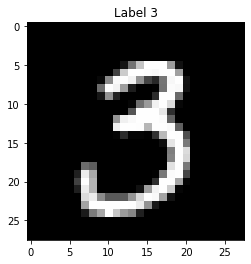

In [55]:
plt.imshow(X_test[90].reshape(28,28),cmap="gray")
plt.title("Label "+str(Y_test[90]))
plt.show()

# Normalisation

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
std=StandardScaler()

In [58]:
X_=std.fit_transform(X_test)

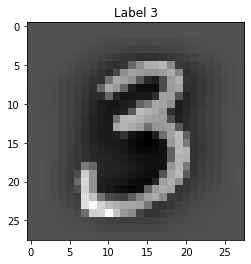

In [59]:
plt.imshow(X_[90].reshape(28,28),cmap="gray")
plt.title("Label "+str(Y_test[90]))
plt.show()

# SKLearn PCA

In [60]:
from sklearn.decomposition import PCA

In [65]:
pca=PCA(n_components=2)

In [80]:
# It converts 784 Features to 2 Features
Z_pca=pca.fit_transform(X_)

In [81]:
Z_pca.shape

(10000, 2)

In [82]:
Z_pca

array([[-5.45829406,  6.41374731],
       [ 2.8044723 , -8.02980558],
       [-7.41124836, -3.86397046],
       ...,
       [-5.00434576,  1.15369397],
       [-1.42096416, -4.42425697],
       [13.14269233, -4.26232539]])

In [68]:
pca.explained_variance_

array([41.39893397, 28.3510575 ])

In [ ]:
'''
Originally data was explaining 100%, But due to compression from 784 features to 2 features. The first Z1 feature explaining
41% and other Z2 feature explaining 28% => 41%+28%=69%, so this implies we have successfully compressed our data
but in the process of doing so, we have lost 31% of data

''' 

# Custom PCA

In [71]:
# Compute Covariance Matrix

covar=np.dot(X_.T,X_)
covar.shape

(784, 784)

In [72]:
# Compute Eigen Vectors of Covar Matrix

U,S,V=np.linalg.svd(covar)

In [73]:
U.shape

(784, 784)

In [76]:
Ured=U[:,:2]
Ured.shape

(784, 2)

In [78]:
# Projection of Data on new axis

Z=np.dot(X_,Ured)
Z.shape

(10000, 2)

In [79]:
# The Z_pca and Z are mirror images
Z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

# Visualize Data

In [83]:
new_dataset=np.hstack((Z,Y_test.reshape(-1,1)))
new_dataset

array([[  5.45831116,  -6.41400668,   7.        ],
       [ -2.80443233,   8.02885014,   2.        ],
       [  7.41124146,   3.86404387,   1.        ],
       ...,
       [  5.00435204,  -1.15364641,   4.        ],
       [  1.42085442,   4.42308066,   5.        ],
       [-13.14268302,   4.26280299,   6.        ]])

In [85]:
df=pd.DataFrame(new_dataset,columns=['PCA1','PCA2','Label'])
df

,PCA1,PCA2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0
...,...,...,...
9995,-3.579478,3.367965,2.0
9996,-3.244816,1.981771,3.0
9997,5.004352,-1.153646,4.0
9998,1.420854,4.423081,5.0


In [86]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

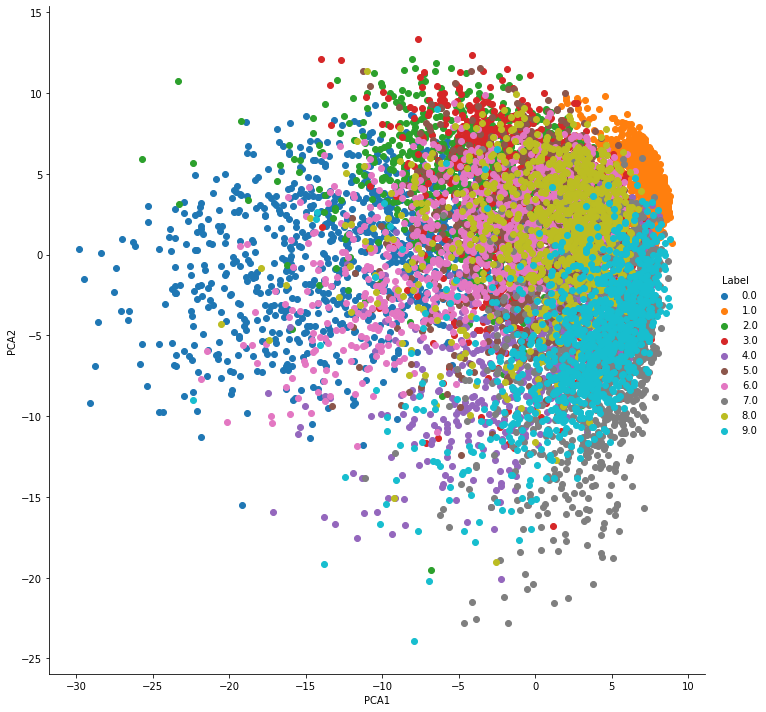

In [89]:
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(df,hue="Label",height=10)
fg.map(plt.scatter,'PCA1','PCA2')
fg.add_legend()
plt.show()

# PCA with 784 Dimensions

In [106]:
pca2=PCA()

In [107]:
Z_pca2=pca2.fit_transform(X_)

In [108]:
Z_pca2.shape

(10000, 784)

In [109]:
pca2.explained_variance_

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [110]:
pca2.explained_variance_ratio_

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [111]:
cum_var_explained=np.cumsum(pca2.explained_variance_ratio_)
cum_var_explained
# We have to only considered till 85 to 90%

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

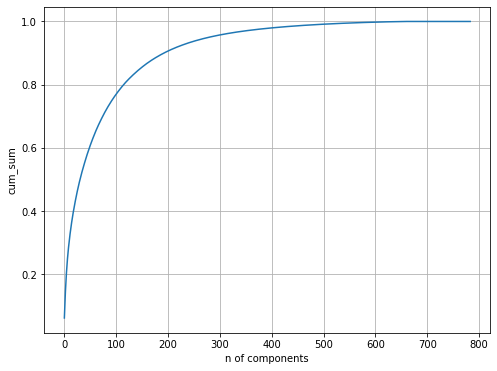

In [112]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.xlabel("n of components")
plt.ylabel("cum_sum")
plt.grid("on")
plt.show()

#From here, we can see at 200 features we can explain 90% of the data, hence K=200